### Applying Linear Support Vector Classifier Model

In [1]:
import numpy as np;             #importing required libraries
import pandas as pd;

df = pd.read_csv("cleanReviews.csv")     #reading the clean csv
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [2]:
df.shape

(50000, 2)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [4]:
print(df.head())

                                              review  sentiment
0  one review mention watch 1 oz episod hook righ...          1
1  wonder littl product film techniqu unassum old...          1
2  thought wonder way spend time hot summer weeke...          1
3  basic famili littl boy jake think zombi closet...          0
4  petter mattei love time money visual stun film...          1


### Vectorizing
#### TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a statistical technique used to evaluate the importance of a word in a document in a collection or corpus of documents.

In [6]:
tfidf = TfidfVectorizer(max_features = 3000)       
X=df['review']
y = df['sentiment']
X = tfidf.fit_transform(X).toarray()

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
y=df.iloc[:,-1].values
print(y)

[1 1 1 ... 0 0 0]


## Building and Training the Model

### Splitting the data into testing (20%) and training data (80%)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Applying Linear LVC Algorithm

In [37]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [38]:
prediction = clf.predict(X_test)

In [39]:
print(classification_report(y_test, prediction))       

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5059
           1       0.87      0.88      0.88      4941

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



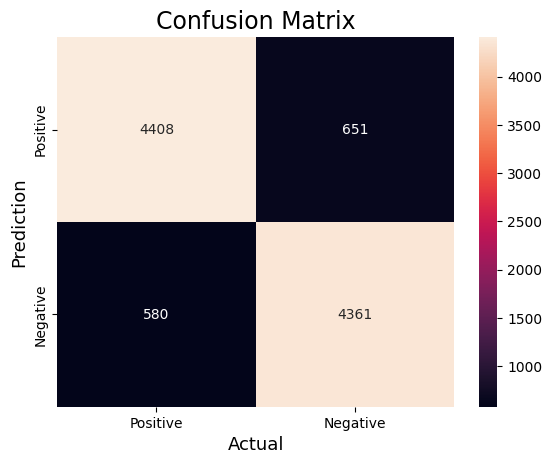

In [49]:
import matplotlib.pyplot as plt                             #plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,prediction)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [40]:
import re                                      
def clean_html(text):
    clean = re.compile('<br\s*/?>')
    return re.sub(clean, '', text)

#converting to lower case
def convert_lower(text):
    return text.lower()

def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x

import nltk
from nltk.corpus import stopwords
def remove_stopwords(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

#perform stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
p=[]
def stem_words(text):
    
    for i in text:
        p.append(ps.stem(i))
    z=p[:] 
    p.clear()
    return z

def join_back(list_input):
    return " ".join(list_input)

In [41]:
def clean(text):
    text = clean_html(text)
    text = convert_lower(text)
    text = remove_special(text)
    text = remove_stopwords(text)
    text = stem_words(text)
    text = join_back(text)
    return text
    


### Testing the Model

In [55]:
def predictor(text):                    #method to clean the review and pass it to the model as imput
    text = clean(text)
    vec = tfidf.transform([text])
    res = clf.predict(vec)
    if res == 1:
        print("Positive Review")
    else:
        print("Negative Review")


In [56]:
predictor("I could think of better ways to spend time")

Negative Review


In [57]:
predictor("It was so emotional, I cried.")

Positive Review


In [58]:
predictor("It really touched my heart")

Positive Review


In [59]:
predictor("It was so funny! I enjoyed it!")

Positive Review


In [68]:
predictor("This movie is a masterpiece! The acting, cinematography, and storyline were all incredible. I highly recommend it.")

Positive Review


### Storing the Model 

#### By using pickle.dump(), the models can be saved to files and loaded back into memory at a later time for prediction on new data.

In [60]:
import pickle
pickle.dump(tfidf, open("tfid_Vectorizer.pkl", "wb"))
pickle.dump(clf, open("LinearSVM_review_sentiment.pkl", "wb"))

### Comparing both Models

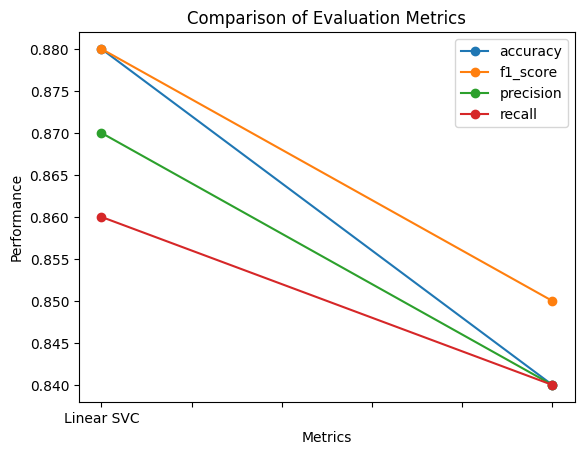

							Multinomial Naive Bayes


In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# create a pandas dataframe with evaluation metrics of both models
data = {'accuracy': [0.88, 0.84],
        'f1_score': [0.88, 0.85],
        'precision': [0.87, 0.84],
        'recall': [0.86, 0.84]}
df = pd.DataFrame(data, index=['Linear SVC', 'Multinomial Naive Bayes'])

# create a line graph
df.plot(kind='line', marker='o', label='Multinomial Naive Bayes')

# add title, axis labels, and legend
plt.title('Comparison of Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Performance')
plt.legend()
plt.xticks(rotation=0)

# display the line graph
plt.show()
print("\t\t\t\t\t\t\tMultinomial Naive Bayes")